In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
parse_dates = ['table_created','table_modified']

In [4]:
df = pd.read_csv("/home/krishna/projects/lineage/data/public_dataset_metadata_fin.csv",parse_dates=parse_dates)

In [127]:
df.tail(5)

,dataset_id,table_columns,table_created,table_id,table_modified,table_num_bytes,table_num_rows,table_type,num_columns
1509,world_bank_wdi,"['country_code', 'short_name', 'table_name', '...",2018-06-26 19:45:55,country_summary,2018-11-14 23:04:47,128516,263,TABLE,763
1510,world_bank_wdi,"['country_code', 'series_code', 'year', 'descr...",2018-06-26 19:48:29,footnotes,2018-11-14 23:10:52,62442245,676230,TABLE,54
1511,world_bank_wdi,"['country_name', 'country_code', 'indicator_na...",2018-06-26 19:55:30,indicators_data,2018-11-14 23:20:50,813392632,7758183,TABLE,85
1512,world_bank_wdi,"['series_code', 'topic', 'indicator_name', 'sh...",2018-06-26 19:45:53,series_summary,2018-11-14 23:05:00,3881002,1600,TABLE,402
1513,world_bank_wdi,"['series_code', 'year', 'description']",2018-06-26 19:45:49,series_time,2018-11-14 23:04:46,40326,441,TABLE,38


In [6]:
df = df[["dataset_id","table_columns","table_created","table_id","table_modified","table_num_bytes","table_num_rows","table_type"]]

In [7]:
df.table_type.unique()

array(['TABLE', 'VIEW', 'MODEL'], dtype=object)

In [9]:
df.dataset_id.unique().tolist()

['austin_311',
 'austin_bikeshare',
 'austin_crime',
 'austin_incidents',
 'austin_waste',
 'baseball',
 'bitcoin_blockchain',
 'bls',
 'census_bureau_construction',
 'census_bureau_international',
 'census_bureau_usa',
 'census_fips_codes',
 'chicago_crime',
 'chicago_taxi_trips',
 'cloud_storage_geo_index',
 'cms_codes',
 'cms_medicare',
 'crypto_bitcoin',
 'eclipse_megamovie',
 'epa_historical_air_quality',
 'ethereum_blockchain',
 'fda_drug',
 'fda_food',
 'fec',
 'genomics_cannabis',
 'ghcn_d',
 'ghcn_m',
 'github_repos',
 'google_analytics_sample',
 'google_political_ads',
 'hacker_news',
 'human_genome_variants',
 'human_variant_annotation',
 'irs_990',
 'libraries_io',
 'london_bicycles',
 'london_crime',
 'london_fire_brigade',
 'medicare',
 'moon_phases',
 'nasa_wildfire',
 'ncaa_basketball',
 'new_york',
 'new_york_311',
 'new_york_citibike',
 'new_york_mv_collisions',
 'new_york_taxi_trips',
 'new_york_trees',
 'nhtsa_traffic_fatalities',
 'nlm_rxnorm',
 'noaa_goes16',
 'no

In [12]:
df.shape

(1514, 8)

In [13]:
df.dataset_id.unique().shape

(82,)

In [14]:
df["num_columns"] = df.apply(lambda x :len(x["table_columns"]),axis =1)

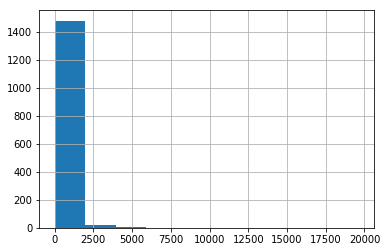

In [15]:
df.num_columns.hist()

In [16]:
df.num_columns.mean()

320.42140026420077

In [17]:
df.num_columns.min()

7

In [18]:
df.num_columns.max()

19649

In [19]:
start_date , end_date = df.table_created.min(), df.table_created.max()

In [20]:
start_date

Timestamp('2016-03-12 01:02:22')

In [21]:
end_date

Timestamp('2019-01-15 03:52:36')

In [22]:
def get_day_of_week(ts) : return ts.dayofweek
def get_day(ts) : return ts.day
def get_month(ts) : return ts.month
def get_year(ts) : return ts.year
def get_minutes(ts) : return ts.minute
def get_hour(ts) : return ts.hour
def get_delta(ts) : return ts - start_date

In [24]:
def get_num_days_since_start_date(ts):
    delta = get_delta(ts)
    return delta.days

In [25]:
def get_num_hours_since_start_date(ts):
    delta = get_delta(ts)
    return round(delta.total_seconds() / 3600)

In [26]:
def get_num_mins_since_start_date(ts):
    delta = get_delta(ts)
    return round(delta.total_seconds() / 60)

In [27]:
get_num_days_since_start_date(end_date)

1039

In [28]:
get_num_hours_since_start_date(end_date)

24939

In [29]:
get_num_mins_since_start_date(end_date)

1496330

In [30]:
def get_qhr(hour, minute) : return hour * 4 +  (minute // 15)

In [51]:
feature_df = df.copy()

In [52]:
feature_df.columns

Index(['dataset_id', 'table_columns', 'table_created', 'table_id',
       'table_modified', 'table_num_bytes', 'table_num_rows', 'table_type',
       'num_columns'],
      dtype='object')

In [53]:
feature_df.isnull().sum()

dataset_id         0
table_columns      0
table_created      0
table_id           0
table_modified     0
table_num_bytes    0
table_num_rows     0
table_type         0
num_columns        0
dtype: int64

In [54]:
feature_df["day_of_week"] = feature_df.table_created.apply(lambda x : get_day_of_week(x))
feature_df["day"] =  feature_df.table_created.apply(lambda x : get_day(x))
feature_df["month"] = feature_df.table_created.apply(lambda x : get_month(x))
feature_df["year"] = feature_df.table_created.apply(lambda x : get_year(x))
feature_df["minute"] = feature_df.table_created.apply(lambda x : get_minutes(x))
feature_df["hour"] = feature_df.table_created.apply(lambda x : get_hour(x))
feature_df["qhr"] = feature_df.apply(lambda x : get_qhr(x["hour"],x["minute"]),axis =1)

In [55]:
feature_df.columns

Index(['dataset_id', 'table_columns', 'table_created', 'table_id',
       'table_modified', 'table_num_bytes', 'table_num_rows', 'table_type',
       'num_columns', 'day_of_week', 'day', 'month', 'year', 'minute', 'hour',
       'qhr'],
      dtype='object')

In [40]:
cols_to_drop = ['dataset_id', 'table_columns', 'table_id',
       'table_modified', 'table_num_bytes', 'table_type']

In [41]:
feature_df.drop(columns=cols_to_drop,inplace=True)

In [42]:
feature_df.head(3)

,table_created,table_num_rows,num_columns,day_of_week,day,month,year,minute,hour,qhr
0,2017-05-18 14:29:56,640525,398,3,18,5,2017,29,14,57
1,2017-05-25 03:43:34,94,69,3,25,5,2017,43,3,14
2,2017-05-25 03:55:42,1077929,154,3,25,5,2017,55,3,15


In [56]:
feature_df["num_days_since_start"] = feature_df.table_created.apply(lambda x : get_num_days_since_start_date(x))
feature_df["num_hours_since_start"] = feature_df.table_created.apply(lambda x : get_num_hours_since_start_date(x))
feature_df["num_mins_since_start"] = feature_df.table_created.apply(lambda x : get_num_mins_since_start_date(x))

In [57]:
cols_to_drop += ["table_created"]

In [58]:
feature_df.drop(columns=["table_created"],inplace=True)

In [46]:
feature_df.drop(columns=["table_num_rows"],inplace=True)

In [47]:
feature_df.drop(columns=["day_of_week","day","month","year","minute","hour","qhr"],inplace=True)

In [49]:
df.head(2)

,dataset_id,table_columns,table_created,table_id,table_modified,table_num_bytes,table_num_rows,table_type,num_columns
0,austin_311,"['unique_key', 'complaint_type', 'complaint_de...",2017-05-18 14:29:56,311_service_requests,2019-01-05 00:58:32,185335640,640525,TABLE,398
1,austin_bikeshare,"['station_id', 'name', 'status', 'latitude', '...",2017-05-25 03:43:34,bikeshare_stations,2019-01-24 10:44:40,7384,94,TABLE,69


In [50]:
feature_df.head(2)

,num_columns,num_days_since_start,num_hours_since_start,num_mins_since_start
0,398,432,10381,622888
1,69,439,10539,632321


In [61]:
feature_df.columns

Index(['dataset_id', 'table_columns', 'table_id', 'table_modified',
       'table_num_bytes', 'table_num_rows', 'table_type', 'num_columns',
       'day_of_week', 'day', 'month', 'year', 'minute', 'hour', 'qhr',
       'num_days_since_start', 'num_hours_since_start',
       'num_mins_since_start'],
      dtype='object')

In [59]:
feature_df.head(2)

,dataset_id,table_columns,table_id,table_modified,table_num_bytes,table_num_rows,table_type,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start
0,austin_311,"['unique_key', 'complaint_type', 'complaint_de...",311_service_requests,2019-01-05 00:58:32,185335640,640525,TABLE,398,3,18,5,2017,29,14,57,432,10381,622888
1,austin_bikeshare,"['station_id', 'name', 'status', 'latitude', '...",bikeshare_stations,2019-01-24 10:44:40,7384,94,TABLE,69,3,25,5,2017,43,3,14,439,10539,632321


In [63]:
feature_df.drop(columns=['dataset_id', 'table_columns', 'table_id', 'table_modified',
       'table_num_bytes','table_type','table_num_rows'],inplace=True)

In [64]:
from sklearn.decomposition import PCA

In [65]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start
0,398,3,18,5,2017,29,14,57,432,10381,622888
1,69,3,25,5,2017,43,3,14,439,10539,632321


In [66]:
pca = PCA(n_components=2)

In [67]:
pca_X = pca.fit_transform(feature_df.values)

In [68]:
pca_X

array([[-6.36019277e+04,  8.21434484e+01],
       [-5.41676260e+04, -2.47497104e+02],
       [-5.41556217e+04, -1.62505997e+02],
       ...,
       [ 5.18564038e+05, -2.72634364e+02],
       [ 5.18555062e+05,  4.43718965e+01],
       [ 5.18554036e+05, -3.19627776e+02]])

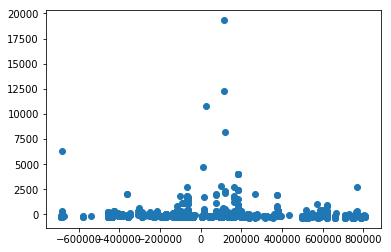

In [69]:
plt.scatter(pca_X[:, 0], pca_X[:, 1])

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [72]:
from sklearn.cluster import KMeans

In [74]:
num_clusters = [_ for _ in range(30,80)]
for k in num_clusters:
    km = KMeans(n_clusters=k)
    cluster_labels = km.fit_predict(pca_X)
    silhouette_avg = silhouette_score(pca_X, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 30 The average silhouette_score is : 0.8491348677139187
For n_clusters = 31 The average silhouette_score is : 0.8343025417658232
For n_clusters = 32 The average silhouette_score is : 0.8365934940322904
For n_clusters = 33 The average silhouette_score is : 0.8383894279279772
For n_clusters = 34 The average silhouette_score is : 0.8530055839820546
For n_clusters = 35 The average silhouette_score is : 0.842198545207326
For n_clusters = 36 The average silhouette_score is : 0.8454295873646194
For n_clusters = 37 The average silhouette_score is : 0.8483309603378777
For n_clusters = 38 The average silhouette_score is : 0.8486929495961687
For n_clusters = 39 The average silhouette_score is : 0.8494459815958318
For n_clusters = 40 The average silhouette_score is : 0.8501963141894076
For n_clusters = 41 The average silhouette_score is : 0.8544359420948516
For n_clusters = 42 The average silhouette_score is : 0.8527789359443853
For n_clusters = 43 The average silhouette_score is 

In [78]:
pca.explained_variance_ratio_.cumsum()

array([0.99999589, 0.99999999])

In [79]:
kmeans = KMeans(n_clusters=73)
kmeans.fit(pca_X)
y_kmeans = kmeans.predict(pca_X)

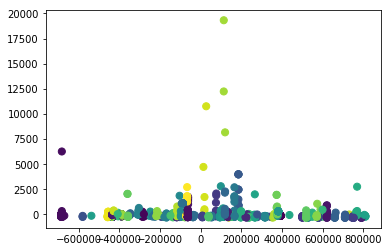

In [80]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y_kmeans, s=50, cmap='viridis')



In [81]:
feature_df["lineage"] = df.dataset_id

In [82]:
feature_df["table_name"] = df.table_id

In [83]:
feature_df["cluster_labels"] = y_kmeans

In [84]:
feature_df.to_csv("sample_data2.csv",index=False)

In [166]:
df.dataset_id.unique().tolist()

['bigdataspain',
 'censo_chile',
 'dbpedia',
 'dbpedia2014temp',
 'fivethirtyeight_uber',
 'freebase20140119',
 'geocode',
 'ghtorrent',
 'github_extracts',
 'hackernews',
 'leadahq_challenge',
 'liquor',
 'mexico',
 'mta_nyc_si',
 'nyc',
 'openlibrary',
 'opensecrets',
 'popular_names',
 'public_dump',
 'pypi',
 'python_extracts',
 'reddit',
 'reddit_comments',
 'reddit_extracts',
 'reddit_posts',
 'reddit_v2',
 'sheets',
 'stackoverflow',
 'stackoverflow_archive',
 'test_acousticbrainz',
 'weather_gsod',
 'wikidata',
 'wikipedia',
 'wikipedia_extracts',
 'wikipedia_v2',
 'wikipedia_v3',
 'wikipedia_vt']

In [85]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start,lineage,table_name,cluster_labels
0,398,3,18,5,2017,29,14,57,432,10381,622888,austin_311,311_service_requests,3
1,69,3,25,5,2017,43,3,14,439,10539,632321,austin_bikeshare,bikeshare_stations,71


In [86]:
feature_df.drop(columns=["lineage","table_name","cluster_labels"],inplace=True)

In [89]:
import ast

In [91]:
df.head(2)

,dataset_id,table_columns,table_created,table_id,table_modified,table_num_bytes,table_num_rows,table_type,num_columns
0,austin_311,"['unique_key', 'complaint_type', 'complaint_de...",2017-05-18 14:29:56,311_service_requests,2019-01-05 00:58:32,185335640,640525,TABLE,398
1,austin_bikeshare,"['station_id', 'name', 'status', 'latitude', '...",2017-05-25 03:43:34,bikeshare_stations,2019-01-24 10:44:40,7384,94,TABLE,69


In [92]:
feature_df["col_names"] = df.table_columns

In [93]:
feature_df["cols"] = feature_df.apply(lambda x : " ".join(ast.literal_eval(x["col_names"])),axis =1)

In [94]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start,col_names,cols
0,398,3,18,5,2017,29,14,57,432,10381,622888,"['unique_key', 'complaint_type', 'complaint_de...",unique_key complaint_type complaint_descriptio...
1,69,3,25,5,2017,43,3,14,439,10539,632321,"['station_id', 'name', 'status', 'latitude', '...",station_id name status latitude longitude loca...


In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
vectorizer = CountVectorizer()

In [97]:
vectorizer.fit(feature_df.cols)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [98]:
len(vectorizer.get_feature_names())

5750

In [99]:
cols_df = pd.DataFrame(vectorizer.transform(feature_df.cols).toarray(),columns=vectorizer.get_feature_names())

In [100]:
cols_df.head(2)

,a_alias,a_assists,a_assists_turnover_ratio,a_blocked_att,a_blocks,a_coach_tech_fouls,a_conf_alias,a_conf_id,a_conf_name,a_defensive_rebounds,...,zip_original,zipba,zipcode,zipcode_geom,zipcode_of_incident,zipma,zone,zone_geom,zone_id,zone_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start,col_names,cols
0,398,3,18,5,2017,29,14,57,432,10381,622888,"['unique_key', 'complaint_type', 'complaint_de...",unique_key complaint_type complaint_descriptio...
1,69,3,25,5,2017,43,3,14,439,10539,632321,"['station_id', 'name', 'status', 'latitude', '...",station_id name status latitude longitude loca...


In [102]:
feature_df.drop(columns=["col_names","cols"],inplace=True)

In [103]:
fin_df = pd.concat([feature_df,cols_df],axis =1)

In [104]:
fin_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,...,zip_original,zipba,zipcode,zipcode_geom,zipcode_of_incident,zipma,zone,zone_geom,zone_id,zone_name
0,398,3,18,5,2017,29,14,57,432,10381,...,0,0,0,0,0,0,0,0,0,0
1,69,3,25,5,2017,43,3,14,439,10539,...,0,0,0,0,0,0,0,0,0,0


In [105]:
fin_df.dropna(inplace=True)

In [106]:
fin_df.shape

(1514, 5761)

In [108]:
pca = PCA(n_components=50)

In [109]:
pca_X2 = pca.fit_transform(fin_df.values)

In [111]:
pca.explained_variance_ratio_.cumsum()

array([0.99999589, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [112]:
sum_squared_distance = []
num_clusters = [_ for _ in range(40,80)]
for k in num_clusters:
    km = KMeans(n_clusters=k)
    cluster_labels = km.fit_predict(pca_X2)
    silhouette_avg = silhouette_score(fin_df.values, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 40 The average silhouette_score is : 0.8517637546422081
For n_clusters = 41 The average silhouette_score is : 0.8554201540464497
For n_clusters = 42 The average silhouette_score is : 0.8572535531268176
For n_clusters = 43 The average silhouette_score is : 0.8603587227592492
For n_clusters = 44 The average silhouette_score is : 0.8548250200271391
For n_clusters = 45 The average silhouette_score is : 0.8612918244085142
For n_clusters = 46 The average silhouette_score is : 0.8648266268441507
For n_clusters = 47 The average silhouette_score is : 0.8660074954469946
For n_clusters = 48 The average silhouette_score is : 0.8645521315321498
For n_clusters = 49 The average silhouette_score is : 0.868624650671157
For n_clusters = 50 The average silhouette_score is : 0.8552393837918003
For n_clusters = 51 The average silhouette_score is : 0.8589199364040287
For n_clusters = 52 The average silhouette_score is : 0.870321969915157
For n_clusters = 53 The average silhouette_score is :

In [113]:
km = KMeans(n_clusters=57)

In [114]:
kmeans.fit(pca_X2)
y_kmeans = kmeans.predict(pca_X2)

In [119]:
fin_df["lineage"] = df.dataset_id

In [121]:
fin_df["table_name"] = df.table_id

In [120]:
fin_df["cluster_labels"] = y_kmeans

In [118]:
feature_df.columns

Index(['num_columns', 'day_of_week', 'day', 'month', 'year', 'minute', 'hour',
       'qhr', 'num_days_since_start', 'num_hours_since_start',
       'num_mins_since_start', 'lineage', 'table_name', 'cluster_labels'],
      dtype='object')

In [84]:
feature_df.to_csv("sample_data2.csv",index=False)

In [123]:
new_df = fin_df[['num_columns', 'day_of_week', 'day', 'month', 'year', 'minute', 'hour',
       'qhr', 'num_days_since_start', 'num_hours_since_start',
       'num_mins_since_start', 'lineage', 'table_name', 'cluster_labels']]

In [124]:
new_df["col_names"] = df.table_columns

/home/krishna/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
new_df.to_csv("sample_data3.csv",index=False)